<a href="https://colab.research.google.com/github/udayaprakash61/1CD22AI061/blob/main/DeepRenforcmentlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

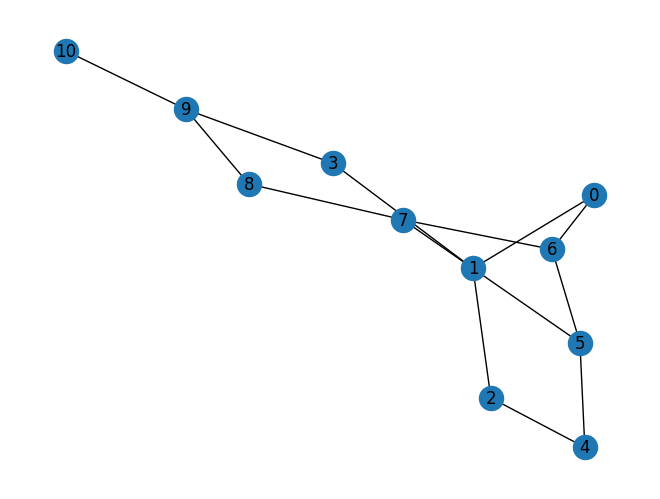

Most efficient path:
[0, np.int64(1), np.int64(3), np.int64(9), np.int64(10)]


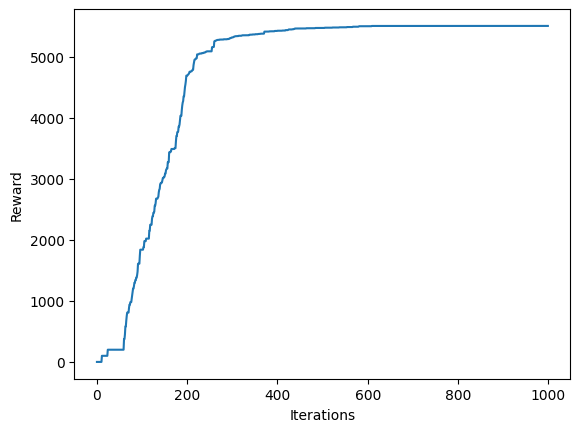


Police Found:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 24.  0.  0. 11.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 58.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 50.  0.  0. 49.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 25.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 38.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug Traces Found:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 17.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 31.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 60.  0.]
 [ 0.  0.  0. 33.  0. 

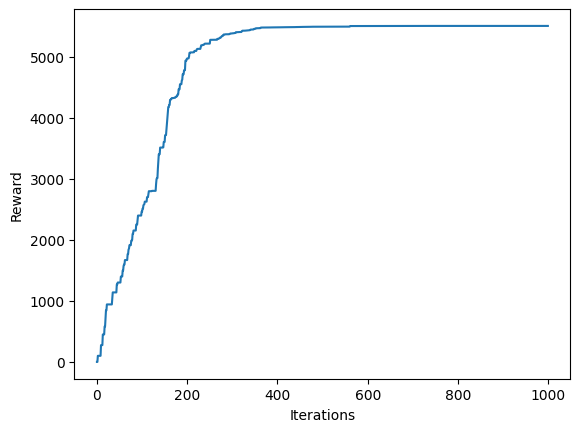

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# -----------------------------
# GRAPH DEFINITION
# -----------------------------
edges = [(0,1),(1,5),(5,6),(5,4),(1,2),(1,3),
         (9,10),(2,4),(0,6),(6,7),(8,9),(7,8),
         (1,7),(3,9)]

goal = 10
n_states = 11
gamma = 0.75

# -----------------------------
# VISUALIZE GRAPH
# -----------------------------
G = nx.Graph(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

# -----------------------------
# REWARD MATRIX
# -----------------------------
R = -np.ones((n_states, n_states))

for a, b in edges:
    R[a, b] = 0
    R[b, a] = 0

R[9, 10] = R[10, 9] = 100
R[goal, goal] = 100

# -----------------------------
# Q MATRIX
# -----------------------------
Q = np.zeros_like(R)

# -----------------------------
# HELPER FUNCTIONS
# -----------------------------
def available_actions(state):
    return np.where(R[state] >= 0)[0]

def choose_action(actions):
    return np.random.choice(actions)

def update_q(state, action):
    Q[state, action] = R[state, action] + gamma * np.max(Q[action])

# -----------------------------
# TRAINING
# -----------------------------
scores = []
for _ in range(1000):
    s = np.random.randint(0, n_states)
    a = choose_action(available_actions(s))
    update_q(s, a)
    scores.append(np.sum(Q))

# -----------------------------
# TESTING
# -----------------------------
state = 0
path = [state]

while state != goal:
    state = np.argmax(Q[state])
    path.append(state)

print("Most efficient path:")
print(path)

plt.plot(scores)
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.show()

# -----------------------------
# ENVIRONMENT AWARE TRAINING
# -----------------------------
police = [2, 4, 5]
drugs  = [3, 8, 9]

env_police = np.zeros_like(R)
env_drugs = np.zeros_like(R)
Q[:] = 0

def environment_feedback(action):
    found = []
    if action in police: found.append('p')
    if action in drugs: found.append('d')
    return found

def update_env_q(state, action):
    Q[state, action] = R[state, action] + gamma * np.max(Q[action])
    env = environment_feedback(action)
    if 'p' in env: env_police[state, action] += 1
    if 'd' in env: env_drugs[state, action] += 1

# -----------------------------
# TRAIN WITH ENVIRONMENT
# -----------------------------
scores = []
for _ in range(1000):
    s = np.random.randint(0, n_states)
    a = choose_action(available_actions(s))
    update_env_q(s, a)
    scores.append(np.sum(Q))

print("\nPolice Found:\n", env_police)
print("\nDrug Traces Found:\n", env_drugs)

plt.plot(scores)
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.show()
